In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/placement.csv")

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [7]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
df.describe()

,Unnamed: 0,cgpa,iq,placement
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,0.000000,3.300000,37.000000,0.000000
25%,24.750000,5.075000,101.500000,0.000000
50%,49.500000,6.000000,127.500000,0.500000
75%,74.250000,6.900000,149.000000,1.000000
max,99.000000,8.500000,233.000000,1.000000


In [9]:
df=df.iloc[:,1:]

In [10]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [11]:
import matplotlib.pyplot as plt

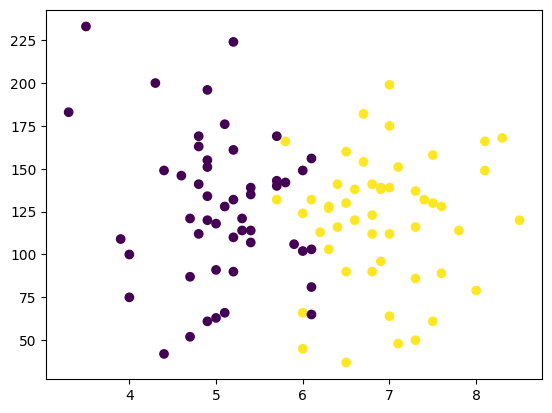

In [15]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [16]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [17]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [24]:
X_train

,cgpa,iq
1,5.9,106.0
6,5.7,143.0
97,6.7,182.0
93,6.8,112.0
58,8.0,79.0
...,...,...
98,6.3,103.0
5,7.1,48.0
46,5.3,114.0
96,4.4,42.0


In [26]:
X_test

,placement
1,0
6,0
97,1
93,1
58,1
...,...
98,1
5,1
46,0
96,0


In [27]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [29]:
X_train

array([[-0.09872096, -0.44116651],
       [-0.2764187 ,  0.48981225],
       [ 0.61206998,  1.47111418],
       [ 0.70091885, -0.29019698],
       [ 1.76710526, -1.12052938],
       [ 0.87861658,  0.38916589],
       [-0.98720964,  0.69110495],
       [ 0.43437224, -0.84375192],
       [-0.98720964,  0.7917513 ],
       [-0.5429653 , -0.41600492],
       [-0.89836077, -1.52311479],
       [ 0.78976771,  0.38916589],
       [ 0.52322111,  0.36400431],
       [ 0.25667451,  0.11238843],
       [ 1.32286092,  0.1627116 ],
       [-0.98720964, -0.08890428],
       [ 0.70091885, -0.84375192],
       [-0.0098721 ,  0.01174207],
       [ 1.23401205,  0.21303478],
       [-1.16490738, -0.06374269],
       [-0.18756983,  1.06852877],
       [-0.5429653 ,  0.38916589],
       [ 0.07897677, -1.47279162],
       [-0.72066304,  0.21303478],
       [-1.87569832, -0.36568175],
       [-0.63181417, -0.06374269],
       [-0.2764187 ,  0.41432748],
       [ 1.14516319, -0.94439827],
       [ 0.43437224,

In [43]:
X_test= scaler.transform(X_test)

In [44]:
X_test

array([[  5.4, 107. ],
       [  3.5, 233. ],
       [  6.7, 182. ],
       [  6.9, 139. ],
       [  7. , 112. ],
       [  6.8, 112. ],
       [  4.8, 163. ],
       [  4.9, 120. ],
       [  4.4, 149. ],
       [  7.4, 132. ]])

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
clf=LogisticRegression()

In [47]:
clf.fit(X_train,Y_train)

LogisticRegression()

In [56]:
Y_pred = clf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(Y_test,Y_pred)

1.0

In [61]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

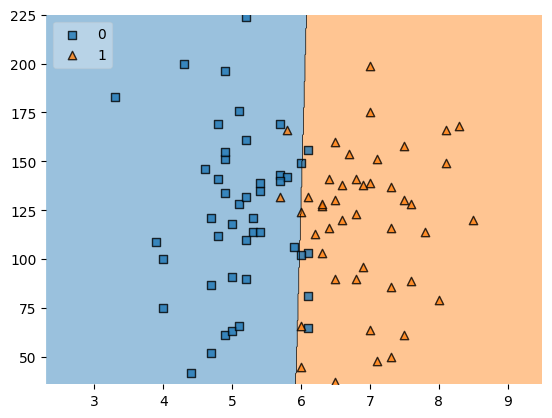

In [70]:
# Assuming X_train is a Pandas DataFrame or similar structure
X_train_np = X_train.values

# Assuming Y_train is a Pandas Series
Y_train_np = Y_train.values

# Now, plot the decision regions with the NumPy arrays
plot_decision_regions(X_train_np, Y_train_np, clf=clf, legend=2)